# Activation Analysis
This notebook extracts and compares activations from a transformer model's layers for two input prompts.


In [1]:
import torch
import ipywidgets as widgets
import transformer_lens
import activation_analysis
import model_loader
from activation_analysis import activation_agg_sim, compare_activation_similarity, display_activation_similarity_tables, display_activation_similarity_plots
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# SELECT MODEL #
model_dropdown = widgets.Dropdown(
    options=list_available_models(),
    value=list_available_models()[0],  # Set default to first model
    description='Select Model:',
    disabled=False,
)
display(model_dropdown)

Dropdown(description='Select Model:', options=('gpt2-small', 'gpt2-medium', 'Qwen 2-0.5B', 'Qwen 2-0.5B-Instru…

In [100]:
# Reload libraries after updating functions
import importlib
importlib.reload(model_loader)
importlib.reload(activation_analysis)
from activation_analysis import activation_agg_sim, compare_activation_similarity, display_activation_similarity_tables, display_activation_similarity_plots
from model_loader import load_model, print_available_models, gpu_mem_check,list_available_models

In [3]:
# Load Model #
model_name = model_dropdown.value
model = load_model(model_name)
gpu_mem_check()

Loading model gpt2-medium from gpt2-medium...


c:\Users\akozlo\AppData\Local\miniconda3\envs\akpy24\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Loaded pretrained model gpt2-medium into HookedTransformer
Model loaded successfully on cuda.
Total GPU Memory: 11.99 GB
Allocated GPU Memory: 1.54 GB
Cached GPU Memory: 1.55 GB


In [5]:
results = compare_activation_similarity(model, "It's so nice outside", "What a beautiful day")
results

('Note: prompt1 and prompt2 have different token lengths. Activation similarity is therefore calculated through aggregating or padding sequences.',
 {'blocks.0.hook_resid_post': 0.9635047912597656,
  'blocks.0.hook_attn_out': 0.7679108381271362,
  'blocks.0.hook_mlp_out': 0.9643539190292358,
  'blocks.1.hook_resid_post': 0.9536586999893188,
  'blocks.1.hook_attn_out': 0.8520128726959229,
  'blocks.1.hook_mlp_out': 0.8013179898262024,
  'blocks.2.hook_resid_post': 0.938654363155365,
  'blocks.2.hook_attn_out': 0.7292483448982239,
  'blocks.2.hook_mlp_out': 0.9651909470558167,
  'blocks.3.hook_resid_post': 0.9920447468757629,
  'blocks.3.hook_attn_out': 0.5267998576164246,
  'blocks.3.hook_mlp_out': 0.9997125864028931,
  'blocks.4.hook_resid_post': 0.9917904138565063,
  'blocks.4.hook_attn_out': 0.28880077600479126,
  'blocks.4.hook_mlp_out': 0.890097439289093,
  'blocks.5.hook_resid_post': 0.9918942451477051,
  'blocks.5.hook_attn_out': 0.07603635638952255,
  'blocks.5.hook_mlp_out': 0.

In [6]:
display_activation_similarity_tables(model, 
                                    prompt1 = "It's so nice outside", 
                                    prompt2 = "What a beautiful day;",
                                     mlp=True, attention=True, resid=True)

Note: prompt1 and prompt2 are equal length. Aggregate similarity and flattened sequence similarity may still differ due to differences in how positional activations are compared.


Layer,Aggregate Similarity
blocks.0.hook_resid_post,0.9878
blocks.1.hook_resid_post,0.9818
blocks.2.hook_resid_post,0.9869
blocks.3.hook_resid_post,0.9991
blocks.4.hook_resid_post,0.9988
blocks.5.hook_resid_post,0.9985
blocks.6.hook_resid_post,0.9984
blocks.7.hook_resid_post,0.9983
blocks.8.hook_resid_post,0.9981
blocks.9.hook_resid_post,0.9978


Layer,Aggregate Similarity
blocks.0.hook_attn_out,0.9225
blocks.1.hook_attn_out,0.9694
blocks.2.hook_attn_out,0.7316
blocks.3.hook_attn_out,0.5964
blocks.4.hook_attn_out,0.3027
blocks.5.hook_attn_out,0.2937
blocks.6.hook_attn_out,0.4324
blocks.7.hook_attn_out,0.6290
blocks.8.hook_attn_out,0.3529
blocks.9.hook_attn_out,0.4454


Layer,Aggregate Similarity
blocks.0.hook_mlp_out,0.9879
blocks.1.hook_mlp_out,0.8965
blocks.2.hook_mlp_out,0.9899
blocks.3.hook_mlp_out,0.9999
blocks.4.hook_mlp_out,0.9167
blocks.5.hook_mlp_out,0.9406
blocks.6.hook_mlp_out,0.8121
blocks.7.hook_mlp_out,0.7397
blocks.8.hook_mlp_out,0.5661
blocks.9.hook_mlp_out,0.3476


Note: prompt1 and prompt2 are equal length. Aggregate similarity and flattened sequence similarity may still differ due to differences in how positional activations are compared.


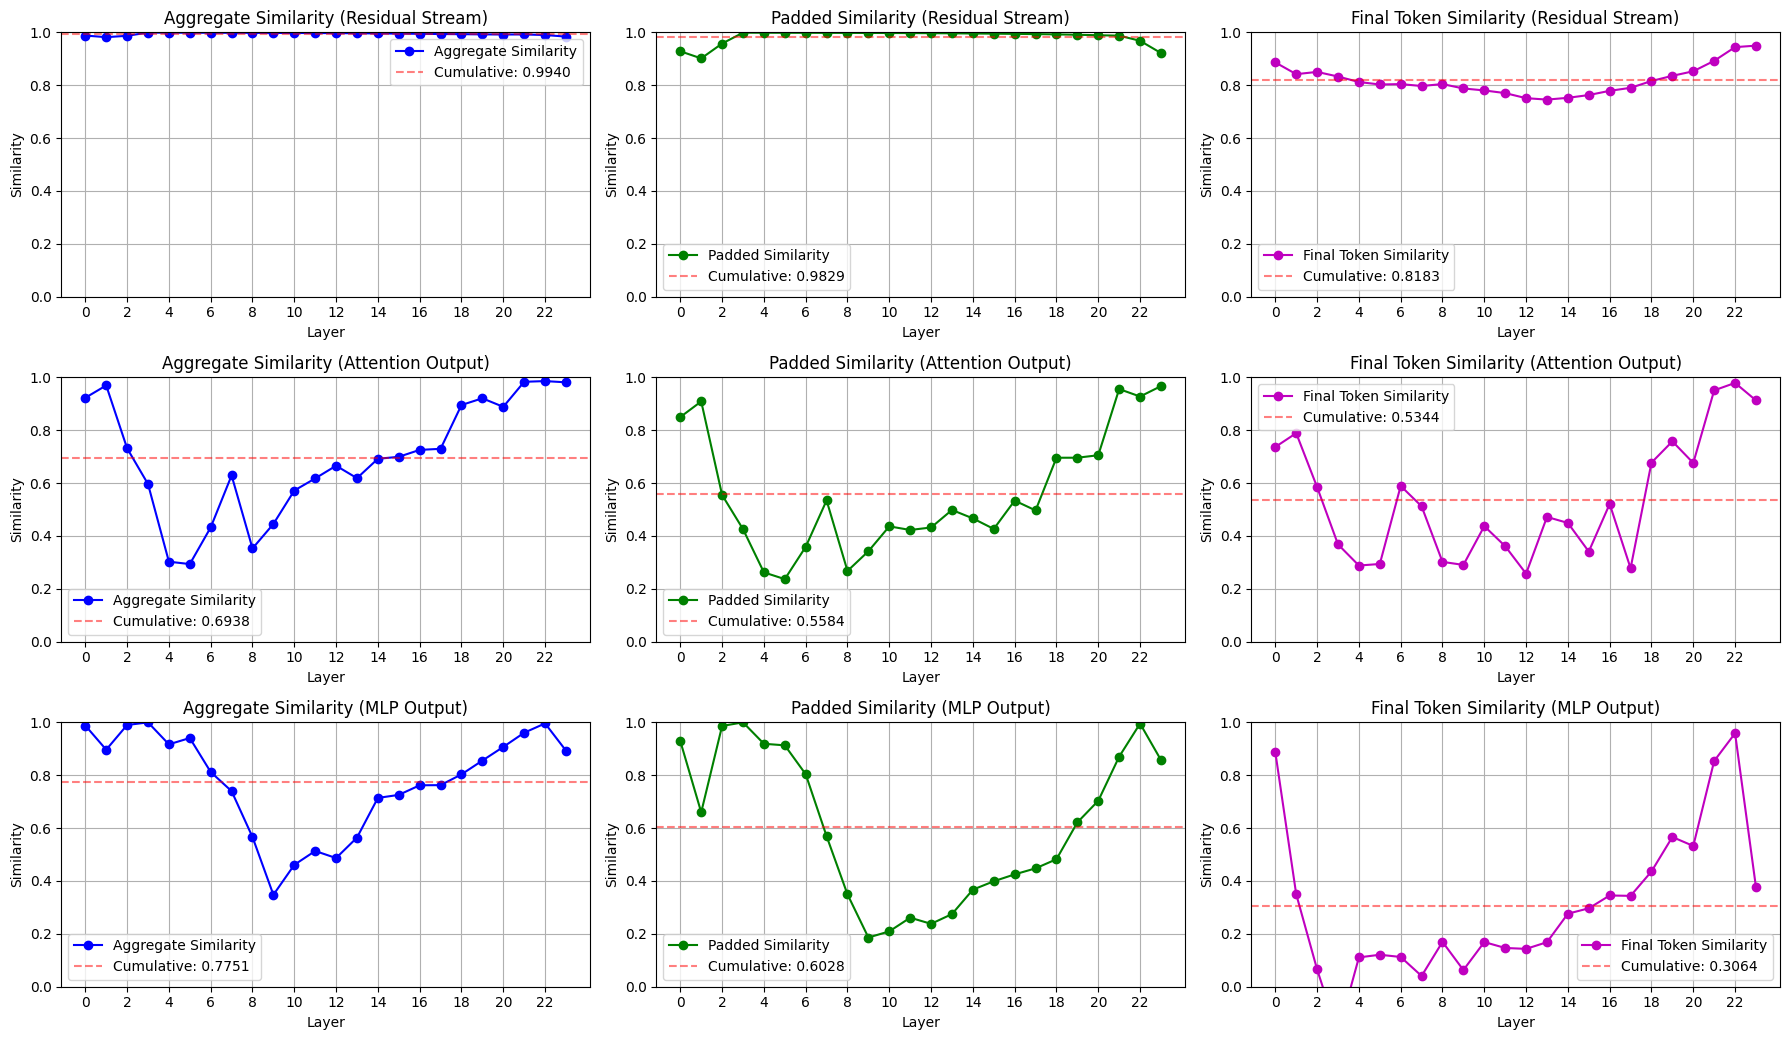

In [7]:
display_activation_similarity_plots(model,
                                    prompt1 = "It's so nice outside", 
                                    prompt2 = "What a beautiful day;",
                                    resid=True, attention=True, mlp=True, logscale=False)

In [108]:
import torch
from transformer_lens import HookedTransformer

def get_activation_tensor(transformer: HookedTransformer, prompt: str, layer: int, part: str) -> torch.Tensor:
    """
    Retrieve the specified activation tensor from a HookedTransformer model.

    Args:
        transformer (HookedTransformer): The HookedTransformer model.
        prompt (str): The input prompt.
        layer (int): The layer number to retrieve activations from (0-indexed).
        part (str): The part of the architecture to target. 
                'attn_out': The output of the attention sublayer.
                'attn_pattern': The attention patterns (weights) from the attention heads.
                'mlp_out': The output of the MLP sublayer.
                'resid_pre': The residual connection before any sublayers.
                'resid_mid': The residual after the attention sublayer and before the MLP.
                'resid_post': The residual after both the attention and MLP sublayers.
    Returns:
        torch.Tensor: The activation tensor for the specified layer and part.

    Raises:
        ValueError: If an invalid part is specified or if the layer/part does not exist.
    """
    # Map parts to hook names
    part_to_hook_name = {
        'attn_out': f'blocks.{layer}.hook_attn_out',
        'mlp_out': f'blocks.{layer}.hook_mlp_out',
        'resid_pre': f'blocks.{layer}.hook_resid_pre',
        'resid_mid': f'blocks.{layer}.hook_resid_mid',
        'resid_post': f'blocks.{layer}.hook_resid_post',
        'attn_pattern': f'blocks.{layer}.attn.hook_pattern',
    }

    if part not in part_to_hook_name:
        raise ValueError(f"Invalid part '{part}'. Valid parts are: {list(part_to_hook_name.keys())}")

    hook_name = part_to_hook_name[part]

    # Run the model with cache
    _, cache = transformer.run_with_cache(prompt)

    # Retrieve the activation from the cache
    if hook_name not in cache:
        # For debugging: print available keys
        print(f"Available keys in cache: {list(cache.keys())}")
        raise ValueError(f"No activation captured for part '{part}' in layer {layer}.")

    return cache[hook_name]


In [105]:
act1 = get_activation_tensor(model, "The weather is fantastic", 7, "resid_post")
act2 = get_activation_tensor(model, "It's so nice outside", 7, "resid_post")
activation_agg_sim(act1, act2)
#torch.nn.functional.cosine_similarity(act1, act2, dim=-1)

tensor([0.9974], device='cuda:0')

In [76]:
model.to_tokens("The")

tensor([[50256,   464]], device='cuda:0')